In [60]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import sqlalchemy as alch
import numpy as np

In [61]:
# Set up emngines and connections
engine = alch.create_engine('sqlite:///jobs_preprocessed.db', echo=False)
engine_2 = alch.create_engine('sqlite:///jobs_LDA_20.db', echo=False)

In [62]:
con1 = engine.connect()
con2 = engine_2.connect()

In [63]:
# verify row count in both
result = con1.execute("SELECT COUNT(*) FROM jobs")
for row in result:
    count = row[0]
print(count)

3279172


In [64]:
result = con2.execute("SELECT COUNT(*) FROM jobs")
for row in result:
    count = row[0]
print(count)

3279172


In [65]:
%%time
topic_counts = [0]*20
# create a topic counter from the second connection
result = con2.execute("SELECT jobTopic FROM jobs")
for row in result:
    topic_counts[row[0]]+=1

Wall time: 6.02 s


In [66]:
# display the number of ads in each topic
print(topic_counts)

[108290, 229783, 189403, 83736, 192448, 83369, 96907, 261021, 141600, 30444, 227496, 112410, 189331, 205652, 254693, 317888, 102978, 149947, 88947, 212829]


In [67]:
%%time
# load all jobid/topic pairs
i=0
pairs = [None]*count
result = con2.execute("SELECT * FROM jobs")
for row in result:
    pairs[i] = [row[0], row[1]]
    i+=1

Wall time: 8.54 s


In [68]:
print(pairs[1578])

[37001578, 19]


In [69]:
def generate_cloud(topic_id):
    # create a wordcloud for a desired topic
    ad_count = topic_counts[topic_id]
    ads = [None]*ad_count

    i = 0
    j = 0

    result = con1.execute("SELECT jobid, jobDescription FROM jobs")
    for row in result:
        if topic_id == pairs[i][1]:
            ads[j] = row[1]
            j+=1
        i+=1
    ads = ' '.join(ads)
    stopwords = set(STOPWORDS)
    # extend the stopwords
    new_stopwords = ['employment', 'experience','join','send','apply','now','role','opportunity','pay','skill','ability',
                     'work', 'application','candidate','full','part','time','welcome']
    for word in new_stopwords:
        stopwords.add(word)
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords,
                    max_words = 100,
                    min_font_size = 10, color_func=lambda *args, **kwargs: (0,0,0)).generate(ads) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 


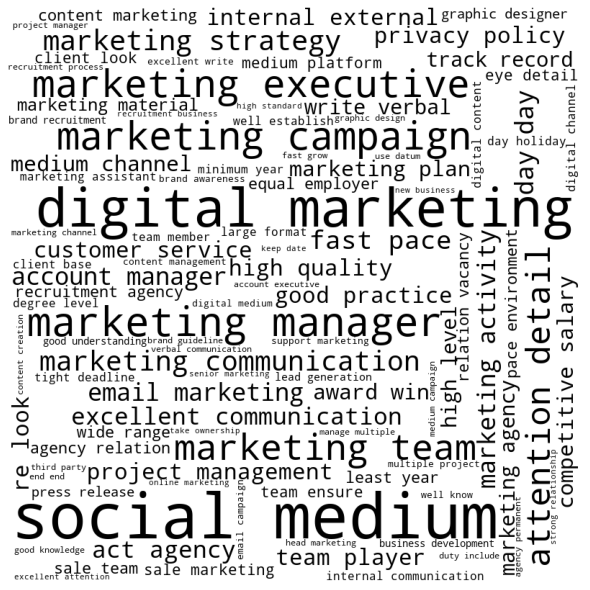

In [70]:
generate_cloud(0)

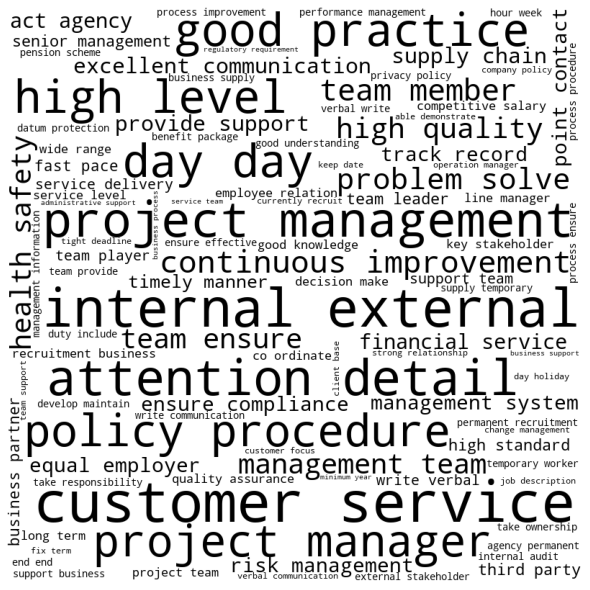

In [71]:
generate_cloud(1)

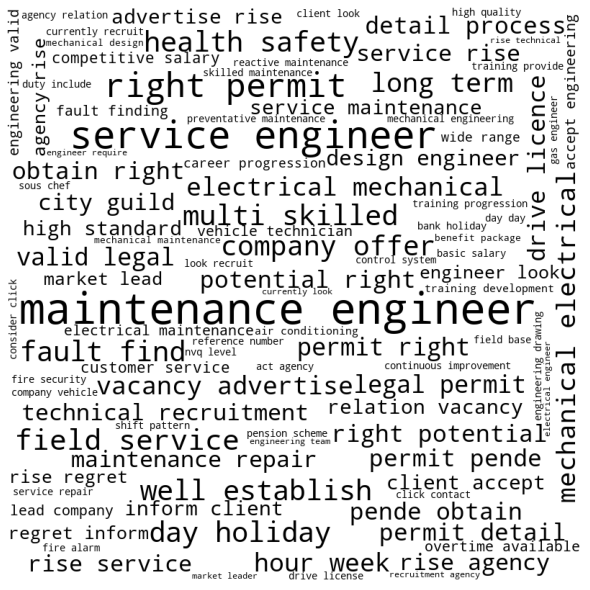

In [72]:
generate_cloud(2)

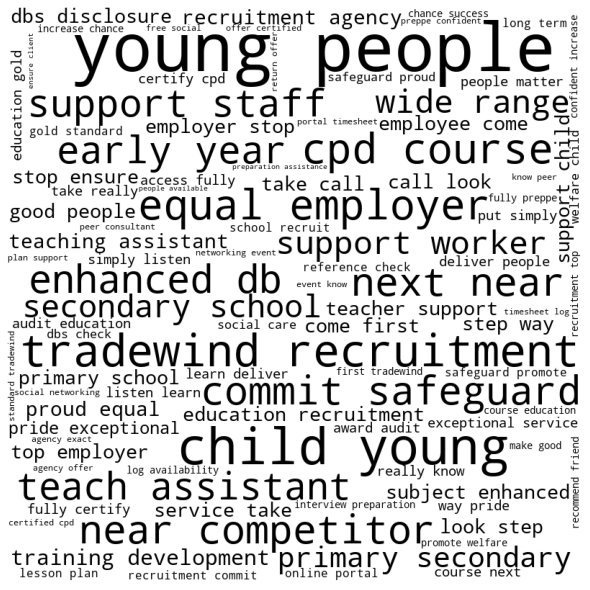

In [73]:
generate_cloud(3)

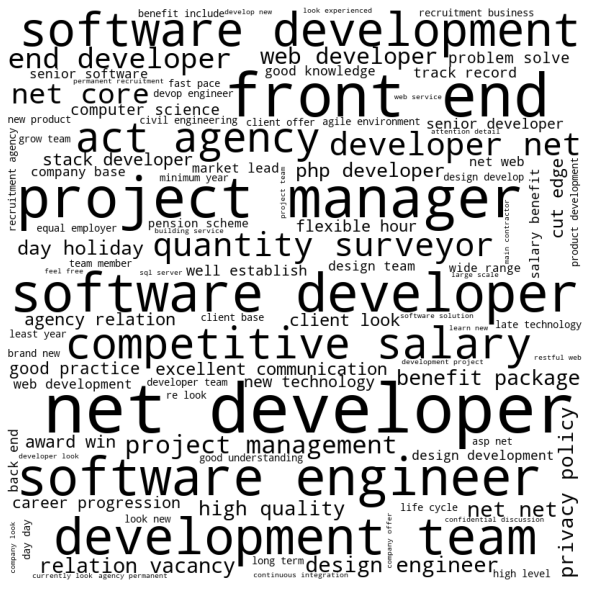

In [74]:
generate_cloud(4)

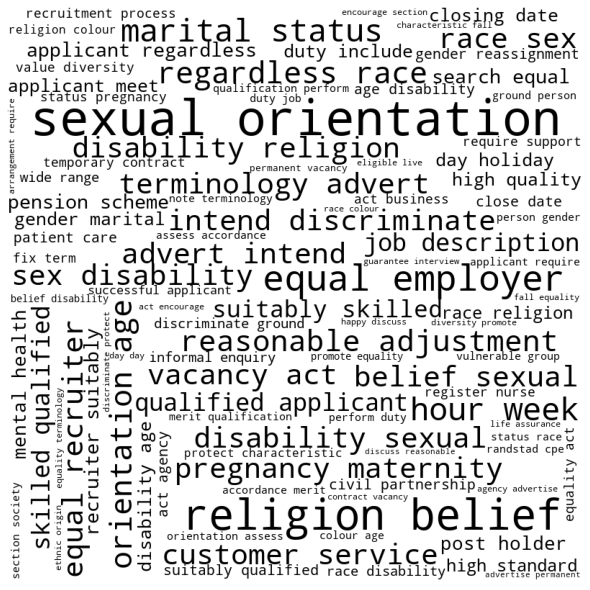

In [75]:
generate_cloud(5)

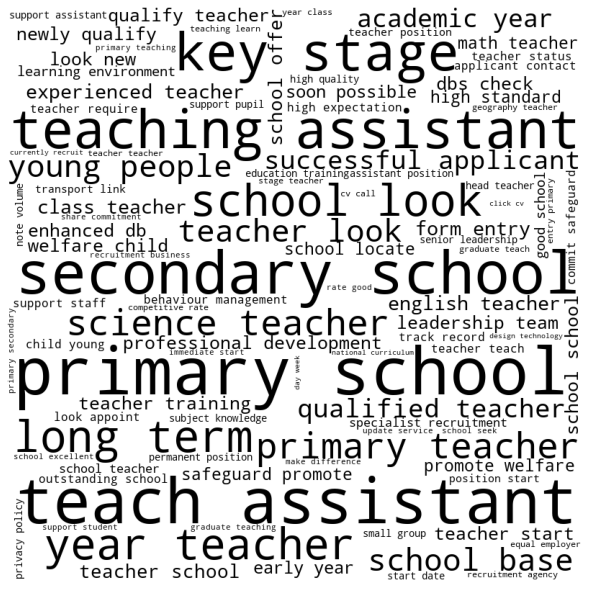

In [76]:
generate_cloud(6)

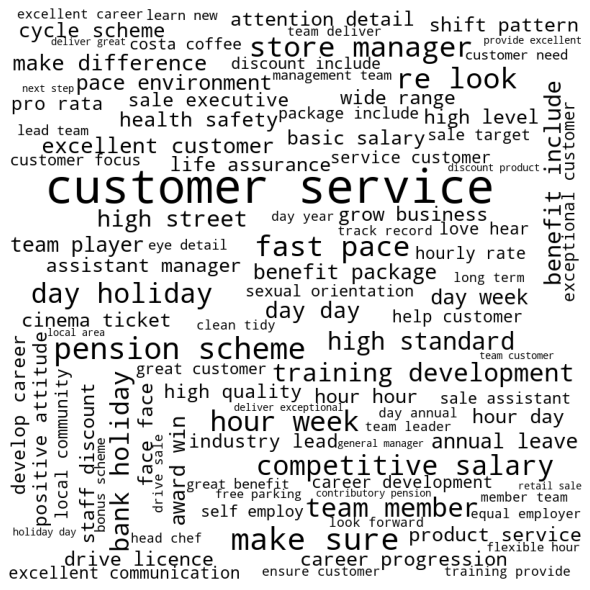

In [77]:
generate_cloud(7)

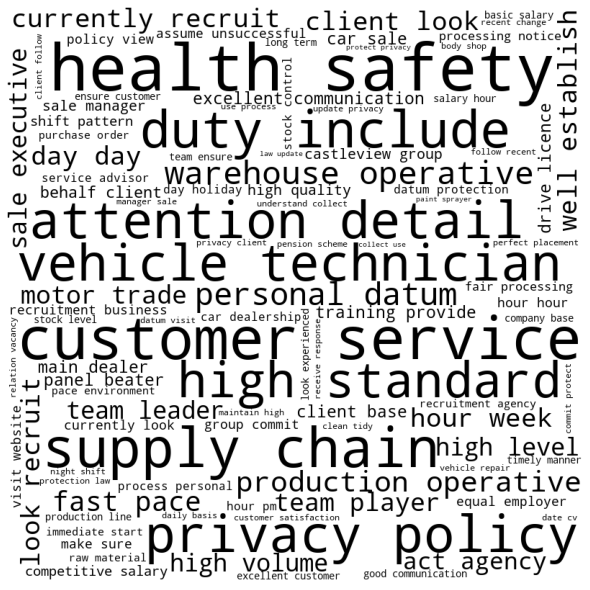

In [78]:
generate_cloud(8)

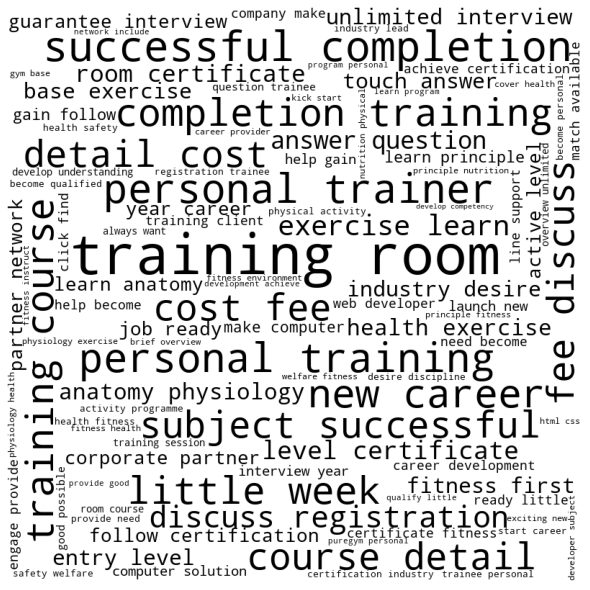

In [79]:
generate_cloud(9)

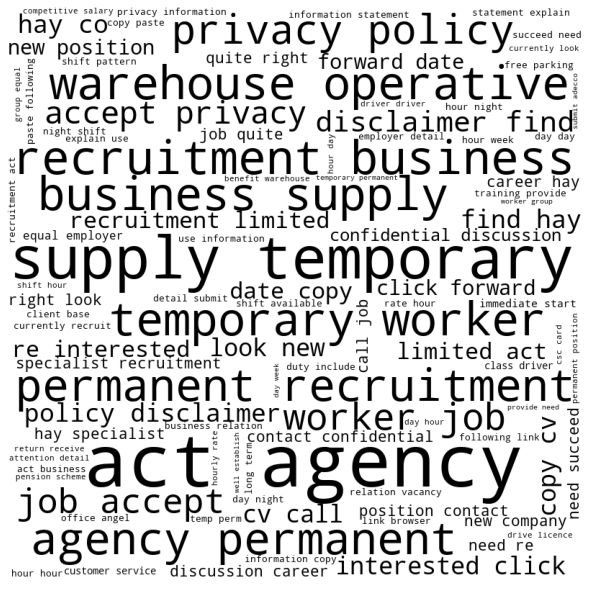

In [80]:
generate_cloud(10)

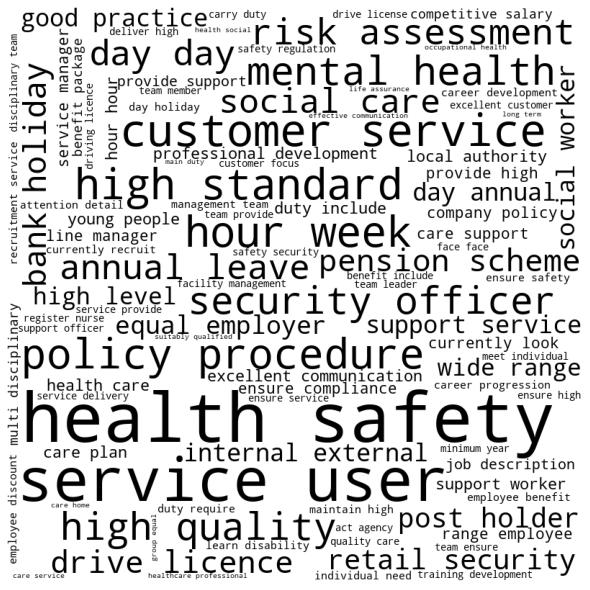

In [81]:
generate_cloud(11)

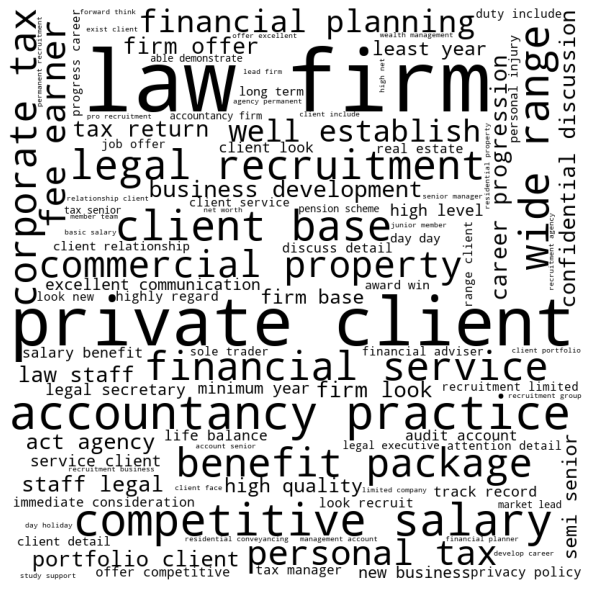

In [82]:
generate_cloud(12)

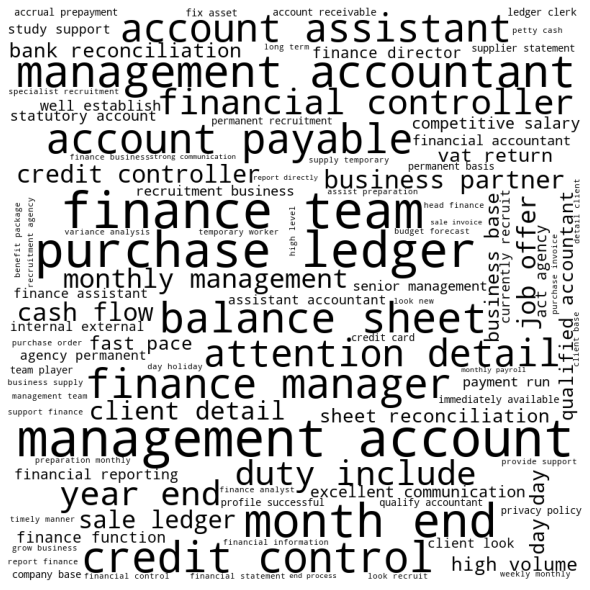

In [83]:
generate_cloud(13)

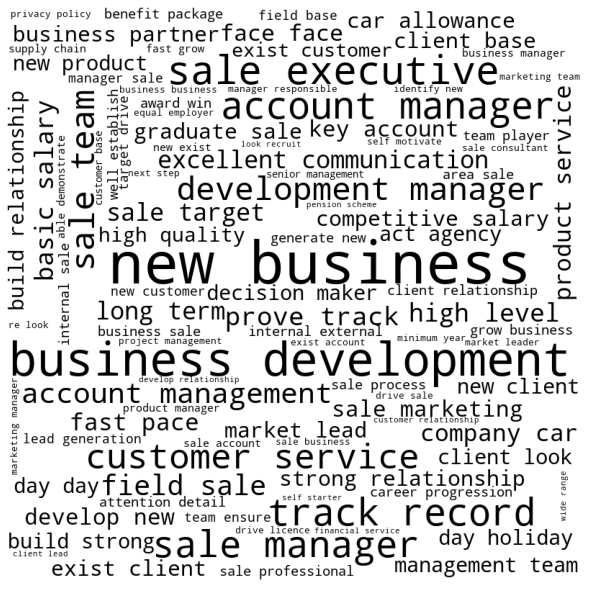

In [84]:
generate_cloud(14)

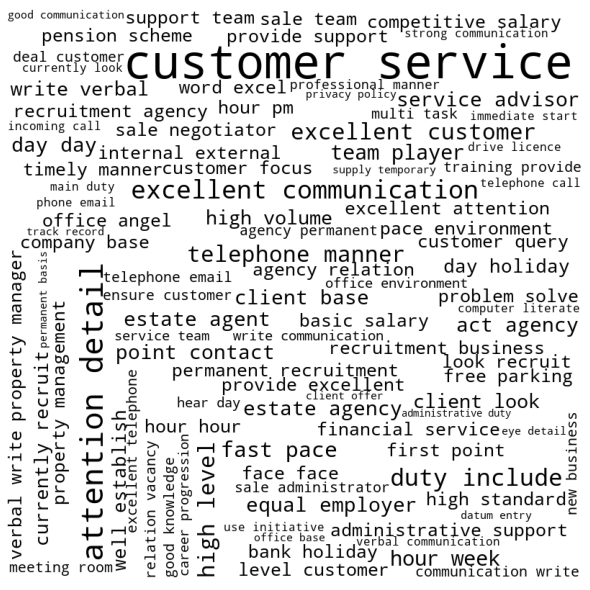

In [85]:
generate_cloud(15)

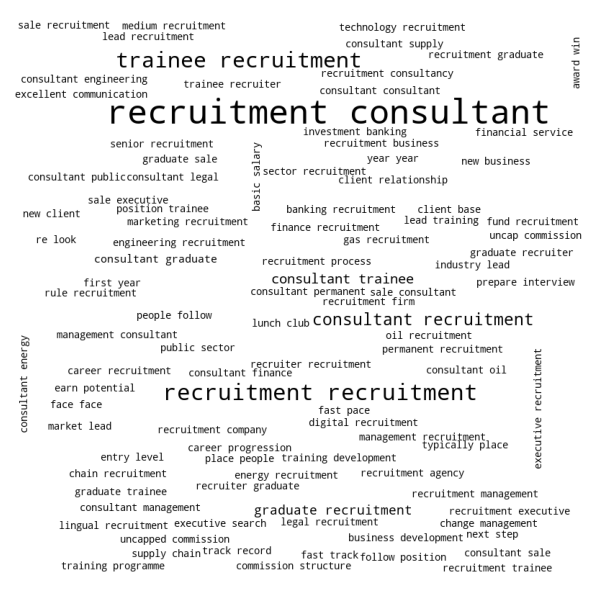

In [86]:
generate_cloud(16)

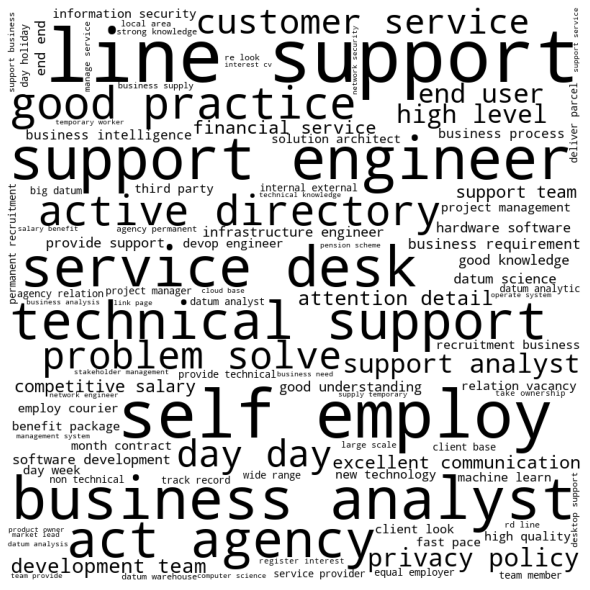

In [87]:
generate_cloud(17)

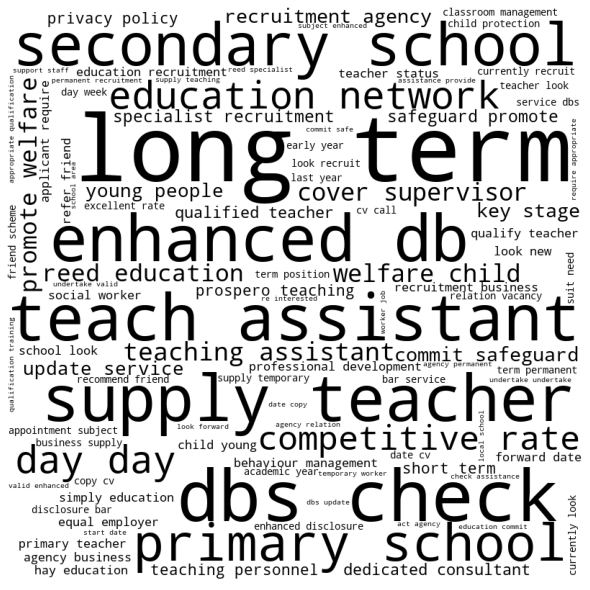

In [88]:
generate_cloud(18)

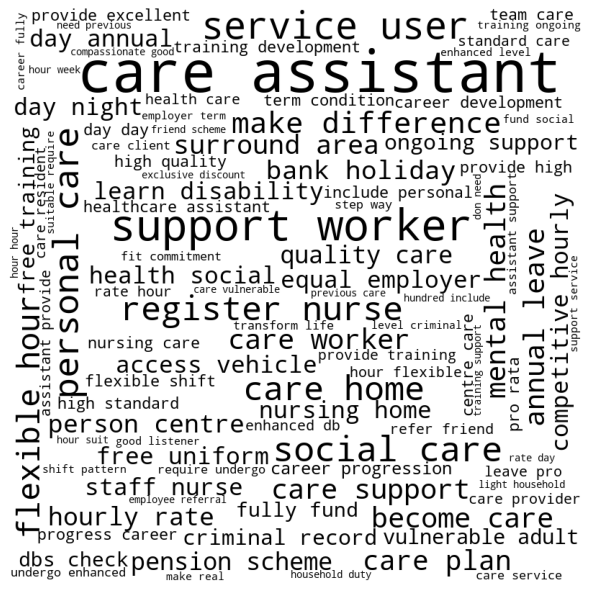

In [89]:
generate_cloud(19)